In [1]:
#working in geopandas - import the module
import geopandas as gpd

In [2]:
#import first dataset (LA parks) and take a quick look
parks=gpd.read_file('data/LA_Parks_Information.geojson')
parks.head()

,name,shape_area,objectid,park_id,name_alpha,shape_leng,area_acres,issubpark,region,address,name_publi,park_class,cd_real,geometry
0,Robert F Kennedy Inspiration Memorial Park,6501.37488025,1,1056,ROBERT F KENNEDY PARK (LAUSD) JUA,641.47054538,0.149251627315,N,M,"3400 W Wilshire Blvd, LA 90010",Kennedy (Robert F) Inspiration Memorial Park (...,N,10,"MULTIPOLYGON (((-118.29796 34.06162, -118.2969..."
1,Sycamore Grove Park,691462.199493,2,736,SYCAMORE GROVE PARK,6227.3991903,15.8738513625,N,M,"4702 N Figueroa St, LA 90042",Sycamore Grove Park,C,01,"MULTIPOLYGON (((-118.20110 34.10134, -118.2011..."
2,San Pedro Welcome Park,17402.1579777,3,328,SAN PEDRO WELCOME PARK,560.372862441,0.399500174163,N,P,"451 N Gaffey St, San Pedro 90731",Formerly Welcome Park,N,15,"MULTIPOLYGON (((-118.29286 33.74600, -118.2928..."
3,Country Club Heritage Park,3647.84860118,4,1045,COUNTRY CLUB PARK HERITAGE PLAZA,287.523337381,0.0837434158085,N,M,"1015 S Wilton Pl, LA 90018",AKA Wilton Place Park,N,10,"MULTIPOLYGON (((-118.31504 34.05232, -118.3149..."
4,Watts Cultural Crescent,128793.355722,5,1046,WATTS CULTURAL CRESCENT,2852.11033344,2.95670043382,N,P,"1780 E Santa Ana Blvd, LA 90002",AKA Watts Towers Cultural Cresent,N,15,"MULTIPOLYGON (((-118.24221 33.93945, -118.2422..."


In [3]:
columns_to_drop = ['name_alpha','issubpark','name_publi']
parks = parks.drop(columns_to_drop,axis=1)
parks.head()

,name,shape_area,objectid,park_id,shape_leng,area_acres,region,address,park_class,cd_real,geometry
0,Robert F Kennedy Inspiration Memorial Park,6501.37488025,1,1056,641.47054538,0.149251627315,M,"3400 W Wilshire Blvd, LA 90010",N,10,"MULTIPOLYGON (((-118.29796 34.06162, -118.2969..."
1,Sycamore Grove Park,691462.199493,2,736,6227.3991903,15.8738513625,M,"4702 N Figueroa St, LA 90042",C,01,"MULTIPOLYGON (((-118.20110 34.10134, -118.2011..."
2,San Pedro Welcome Park,17402.1579777,3,328,560.372862441,0.399500174163,P,"451 N Gaffey St, San Pedro 90731",N,15,"MULTIPOLYGON (((-118.29286 33.74600, -118.2928..."
3,Country Club Heritage Park,3647.84860118,4,1045,287.523337381,0.0837434158085,M,"1015 S Wilton Pl, LA 90018",N,10,"MULTIPOLYGON (((-118.31504 34.05232, -118.3149..."
4,Watts Cultural Crescent,128793.355722,5,1046,2852.11033344,2.95670043382,P,"1780 E Santa Ana Blvd, LA 90002",N,15,"MULTIPOLYGON (((-118.24221 33.93945, -118.2422..."


In [4]:
parks.columns = ['name',
 'area_sf',
 'object_id',
 'park_id',
 'shape_leng',
 'area_acres',
 'region',
 'address',
 'class',
 'cd',
 'geometry']
parks.head()

,name,area_sf,object_id,park_id,shape_leng,area_acres,region,address,class,cd,geometry
0,Robert F Kennedy Inspiration Memorial Park,6501.37488025,1,1056,641.47054538,0.149251627315,M,"3400 W Wilshire Blvd, LA 90010",N,10,"MULTIPOLYGON (((-118.29796 34.06162, -118.2969..."
1,Sycamore Grove Park,691462.199493,2,736,6227.3991903,15.8738513625,M,"4702 N Figueroa St, LA 90042",C,01,"MULTIPOLYGON (((-118.20110 34.10134, -118.2011..."
2,San Pedro Welcome Park,17402.1579777,3,328,560.372862441,0.399500174163,P,"451 N Gaffey St, San Pedro 90731",N,15,"MULTIPOLYGON (((-118.29286 33.74600, -118.2928..."
3,Country Club Heritage Park,3647.84860118,4,1045,287.523337381,0.0837434158085,M,"1015 S Wilton Pl, LA 90018",N,10,"MULTIPOLYGON (((-118.31504 34.05232, -118.3149..."
4,Watts Cultural Crescent,128793.355722,5,1046,2852.11033344,2.95670043382,P,"1780 E Santa Ana Blvd, LA 90002",N,15,"MULTIPOLYGON (((-118.24221 33.93945, -118.2422..."


In [5]:
# I'll want to sort these by size later, but area_acres and area_sf are strings
# Make them floats.
parks['area_acres'] = parks['area_acres'].astype(float)
parks['area_sf'] = parks['area_sf'].astype(float)

In [6]:
# import second data set, 311 service reqs for encampments.
encamp_2017 = gpd.read_file('data/2017-311_Homeless_Encampment_Requests_raw.csv')

In [7]:
# this one has a lot of columns. let's rename some. First list them.
columns = list(encamp_2017)
columns

['SRNumber',
 'CreatedDate',
 'UpdatedDate',
 'ActionTaken',
 'Owner',
 'RequestType',
 'Status',
 'RequestSource',
 'MobileOS',
 'Anonymous',
 'AssignTo',
 'ServiceDate',
 'ClosedDate',
 'AddressVerified',
 'ApproximateAddress',
 'Address',
 'HouseNumber',
 'Direction',
 'StreetName',
 'Suffix',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Location',
 'TBMPage',
 'TBMColumn',
 'TBMRow',
 'APC',
 'CD',
 'CDMember',
 'NC',
 'NCName',
 'PolicePrecinct',
 'geometry']

In [8]:
# Then copy and paste to rename.
encamp_2017.columns = ['req_num',
 'created_date',
 'updated_date',
 'action_taken',
 'owner',
 'req_type',
 'status',
 'req_source',
 'mobile',
 'anon',
 'assign_to',
 'serve_date',
 'closed_date',
 'add_verf',
 'aprox_add',
 'add',
 'house_num',
 'direction',
 'st_name',
 'suffix',
 'zip',
 'lat',
 'long',
 'loc',
 'TBMPage',
 'TBMColumn',
 'TBMRow',
 'apc',
 'cd',
 'cd_member',
 'nc',
 'nc_name',
 'police_precinct',
 'geometry']

In [9]:
#I need to convert lat & long to floats, but this dataset is weird
#I've had to remove empty values via excel
#let's make sure they're gone
encamp_2017_sorted = encamp_2017.sort_values(by='lat',ascending = True)
encamp_2017_sorted[['created_date','lat','long','loc']].head(10)

,created_date,lat,long,loc
3616,3/9/2017 10:07,33.70685495,-118.2892322,"(33.7068549518, -118.289232202)"
21854,11/6/2017 12:49,33.7098142,-118.2854935,"(33.709814199, -118.285493492)"
14560,8/13/2017 14:33,33.71119586,-118.2930418,"(33.7111958555, -118.293041832)"
15459,8/24/2017 9:46,33.71334069,-118.2897987,"(33.7133406932, -118.289798746)"
16046,8/31/2017 7:57,33.71334069,-118.2897987,"(33.7133406932, -118.289798746)"
16718,9/7/2017 17:06,33.71687011,-118.2883463,"(33.71687011, -118.288346318)"
767,1/16/2017 14:29,33.72070773,-118.2885934,"(33.7207077338, -118.288593449)"
9755,6/11/2017 11:38,33.72162025,-118.2924479,"(33.7216202536, -118.292447948)"
7711,5/11/2017 11:09,33.72186862,-118.2911356,"(33.7218686246, -118.291135597)"
6963,5/1/2017 20:10,33.72317585,-118.2908967,"(33.7231758495, -118.290896653)"


In [10]:
# Now let's drop the ones we don't need.
columns_to_drop = ['updated_date', 'action_taken', 'owner','req_type','status','req_source','mobile','assign_to','serve_date','closed_date','TBMPage','TBMColumn','TBMRow','cd_member','nc_name']
encamp_2017 = encamp_2017.drop(columns_to_drop,axis=1)
encamp_2017.head()

,req_num,created_date,anon,add_verf,aprox_add,add,house_num,direction,st_name,suffix,zip,lat,long,loc,apc,cd,nc,police_precinct,geometry
0,1-411100006,1/1/2017 10:30,Y,Y,,"1415 N MCCADDEN PL, 90028",1415,N,MCCADDEN,PL,90028,34.09658918,-118.3381616,"(34.0965891784, -118.338161593)",Central APC,13,32,HOLLYWOOD,None
1,1-411102191,1/1/2017 10:37,N,Y,N,"DAVID AVE AT VENICE BLVD, 90034",,,,,90034,34.03674605,-118.3755976,"(34.0367460536, -118.375597573)",South Los Angeles APC,10,60,WILSHIRE,None
2,1-411105133,1/1/2017 11:00,N,Y,,"3522 W 8TH ST, 90005",3522,W,8TH,ST,90005,34.05742408,-118.307502,"(34.0574240766, -118.307502018)",Central APC,10,55,OLYMPIC,None
3,1-411121146,1/1/2017 12:00,N,Y,,"761 E ROSE AVE, 90291",761,E,ROSE,AVE,90291,34.00109792,-118.4686821,"(34.0010979182, -118.468682061)",West Los Angeles APC,11,68,PACIFIC,None
4,1-411131621,1/1/2017 12:24,N,Y,N,"14650 W LASSEN ST, 91345",14650,W,LASSEN,ST,91345,34.25010497,-118.4509682,"(34.2501049681, -118.450968208)",North Valley APC,6,101,MISSION,None


In [11]:
#I'm missing the geometry I need to map in geopandas. Let's try to make it
# using the lat/long we do have
g_encamp_2017 = gpd.GeoDataFrame(
    encamp_2017, geometry=gpd.points_from_xy(encamp_2017.long, encamp_2017.lat))
encamp_2017.head()

,req_num,created_date,anon,add_verf,aprox_add,add,house_num,direction,st_name,suffix,zip,lat,long,loc,apc,cd,nc,police_precinct,geometry
0,1-411100006,1/1/2017 10:30,Y,Y,,"1415 N MCCADDEN PL, 90028",1415,N,MCCADDEN,PL,90028,34.09658918,-118.3381616,"(34.0965891784, -118.338161593)",Central APC,13,32,HOLLYWOOD,POINT (-118.33816 34.09659)
1,1-411102191,1/1/2017 10:37,N,Y,N,"DAVID AVE AT VENICE BLVD, 90034",,,,,90034,34.03674605,-118.3755976,"(34.0367460536, -118.375597573)",South Los Angeles APC,10,60,WILSHIRE,POINT (-118.37560 34.03675)
2,1-411105133,1/1/2017 11:00,N,Y,,"3522 W 8TH ST, 90005",3522,W,8TH,ST,90005,34.05742408,-118.307502,"(34.0574240766, -118.307502018)",Central APC,10,55,OLYMPIC,POINT (-118.30750 34.05742)
3,1-411121146,1/1/2017 12:00,N,Y,,"761 E ROSE AVE, 90291",761,E,ROSE,AVE,90291,34.00109792,-118.4686821,"(34.0010979182, -118.468682061)",West Los Angeles APC,11,68,PACIFIC,POINT (-118.46868 34.00110)
4,1-411131621,1/1/2017 12:24,N,Y,N,"14650 W LASSEN ST, 91345",14650,W,LASSEN,ST,91345,34.25010497,-118.4509682,"(34.2501049681, -118.450968208)",North Valley APC,6,101,MISSION,POINT (-118.45097 34.25010)


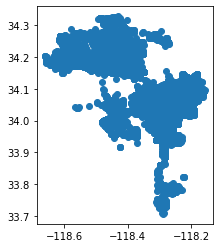

In [12]:
#it worked! Plot to see
g_encamp_2017.plot()

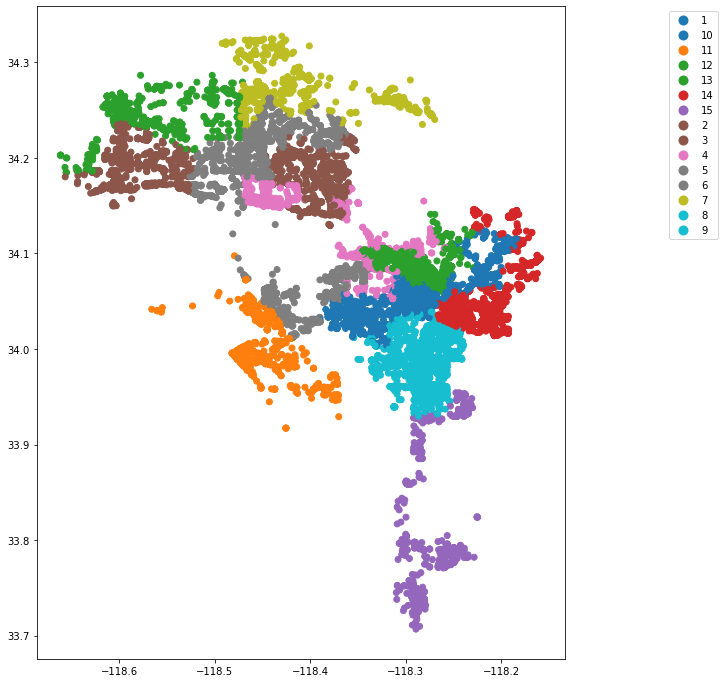

In [13]:
#lets see per council district
g_encamp_2017.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'cd',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }                  # this puts the legend to the side
) 

In [14]:
#convert to floats for folium later
encamp_2017['long'] = encamp_2017['long'].astype(float)
encamp_2017['lat'] = encamp_2017['lat'].astype(float)

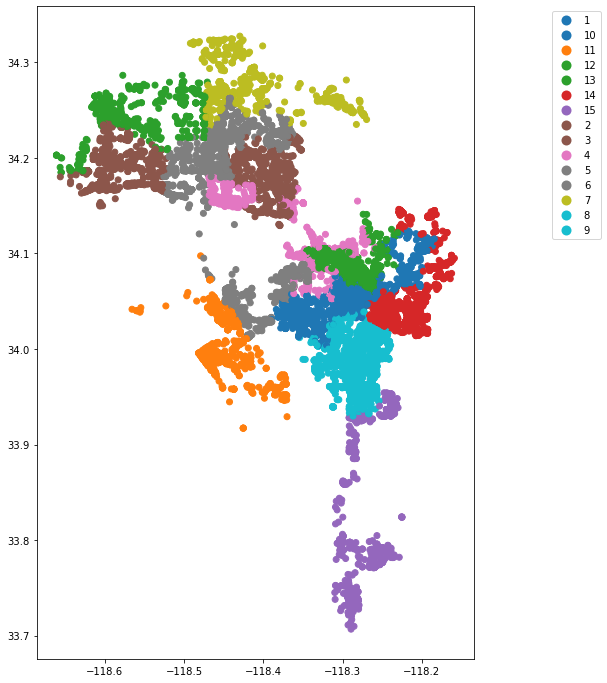

In [15]:
#I want to be able to use the "within" command
#This will let me narrow to encampment reqs within the park polygons
#but I'm getting an error that my indices are different
#and that projections are different. Let's reproject encampments to start.
g_encamp_2017=g_encamp_2017.set_crs("EPSG:4326")
g_encamp_2017.crs

#and replot to make sure things still look right
g_encamp_2017.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'cd',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }                  # this puts the legend to the side
) 

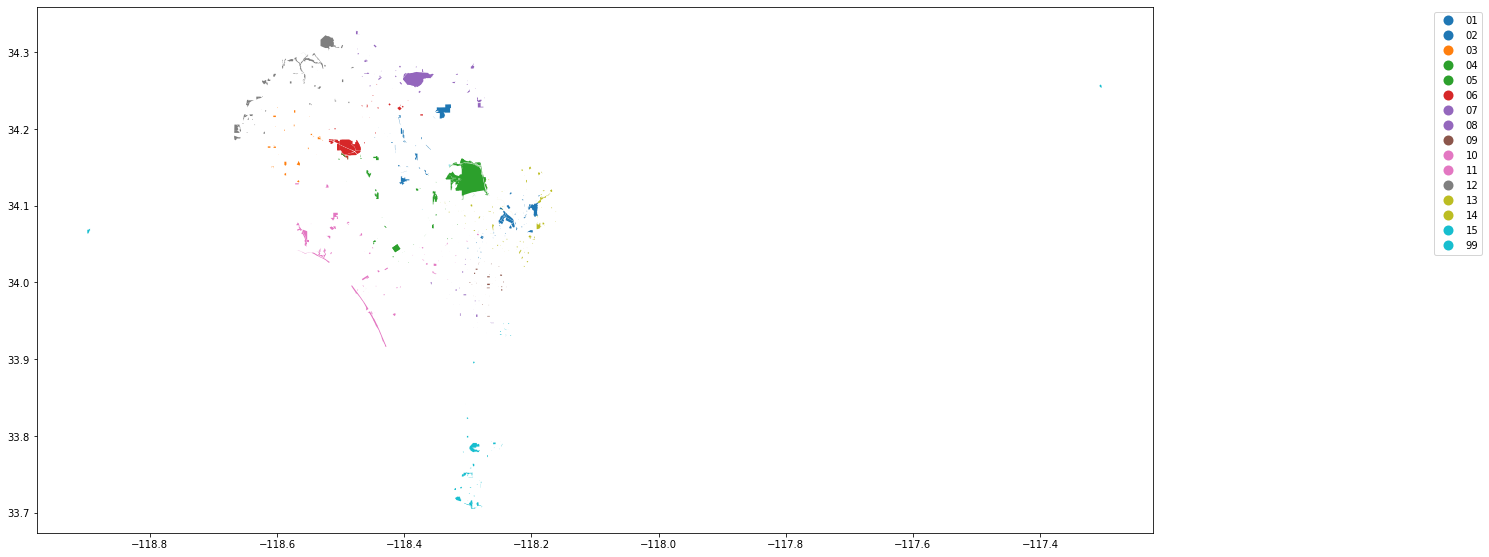

In [16]:
#lets try plotting parks
parks.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'cd',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }                  # this puts the legend to the side
) 

In [17]:
#There seems to be an outlier - is that causing problems? Let's sort to see.
parks_sorted = parks.sort_values(by='cd',ascending = False)
parks_sorted[['name','cd','address', 'area_acres']].head(10)

,name,cd,address,area_acres
365,Buena Vista Park,99,"Bob Hope Dr, between Warner Blvd and W Riversi...",8.710397
286,William S Hart Park - Dog Park,99,"8341 W De Longpre Ave, West Hollywood 90069",0.833393
553,Builders Of Youth Camp,99,"3133 Decker Rd, Malibu 90265",41.707973
545,Camp Seely,99,"250 N Highway 138, Crestline 92325",22.761265
454,Los Angeles Maritime Museum,15,"Berth 84 - Foot of 6th Street at Harbor Blvd, ...",2.478701
446,Banning High School Pool,15,"1450 N Avalon Blvd, Wilmington 90744",0.521919
440,East Wilmington Greenbelt Community Center,15,"918 N Sanford Ave, Wilmington 90744",0.850466
441,Wilmington Veterans Park,15,"1148 N Watson Ave, Wilmington 90744",3.955827
167,Martin J Bogdanovich Recreation Center,15,"1920 W Cumbre Dr, San Pedro 90732",13.515372
74,Ralph C Daniels Field Sports Center,15,"845 W 12th St, 90731",3.588033


In [18]:
#Yep, Camp Seely (row 545) is waaay out in Crestline. Let's try to remove
parks = parks.drop(545,axis=0)

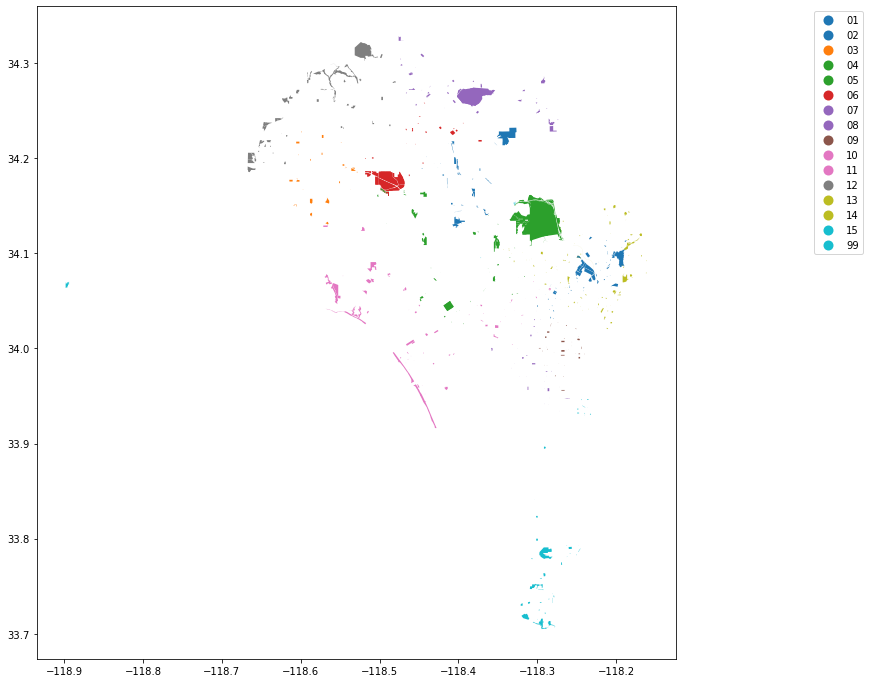

In [19]:
#much better! Still getting channel islands or something but better.
parks.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'cd',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
            }                  # this puts the legend to the side
) 

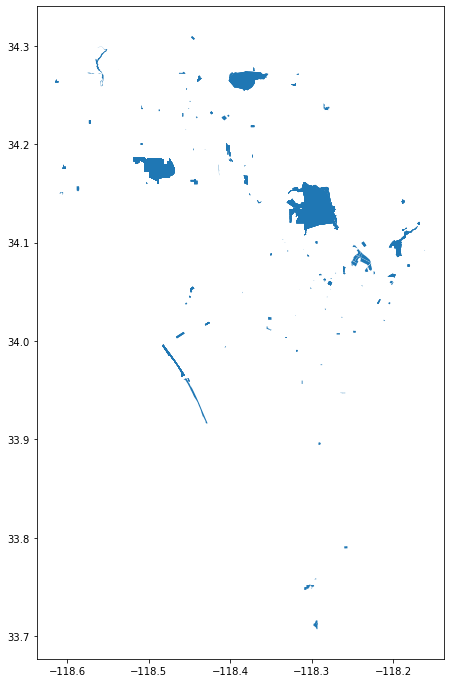

In [20]:
#Let's try a spatial join
parks_encamp_2017 = gpd.sjoin(parks, g_encamp_2017)
parks_encamp_2017.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
) 

In [21]:
#looking at some data, it seems to have worked!
parks_encamp_2017.tail(10)

,name,area_sf,object_id,park_id,shape_leng,area_acres,region,address,class,cd_left,...,st_name,suffix,zip,lat,long,loc,apc,cd_right,nc,police_precinct
499,Warner Ranch Park,726545.392303,500,524,4894.68608776,16.679254,W,"5830 N Topanga Canyon Blvd, Woodland Hills 91367",C,03,...,CALIFA,ST,91367,34.177050,-118.603436,"(34.1770497128, -118.603436448)",South Valley APC,3,16,TOPANGA
499,Warner Ranch Park,726545.392303,500,524,4894.68608776,16.679254,W,"5830 N Topanga Canyon Blvd, Woodland Hills 91367",C,03,...,CALIFA,ST,91367,34.177050,-118.603436,"(34.1770497128, -118.603436448)",South Valley APC,3,16,TOPANGA
499,Warner Ranch Park,726545.392303,500,524,4894.68608776,16.679254,W,"5830 N Topanga Canyon Blvd, Woodland Hills 91367",C,03,...,CALIFA,ST,91367,34.177050,-118.603436,"(34.1770497128, -118.603436448)",South Valley APC,3,16,TOPANGA
499,Warner Ranch Park,726545.392303,500,524,4894.68608776,16.679254,W,"5830 N Topanga Canyon Blvd, Woodland Hills 91367",C,03,...,CALIFA,ST,91367,34.177050,-118.603436,"(34.1770497128, -118.603436448)",South Valley APC,3,16,TOPANGA
499,Warner Ranch Park,726545.392303,500,524,4894.68608776,16.679254,W,"5830 N Topanga Canyon Blvd, Woodland Hills 91367",C,03,...,CALIFA,ST,91367,34.177050,-118.603436,"(34.1770497128, -118.603436448)",South Valley APC,3,16,TOPANGA
528,Hoover Recreation Center,128532.069626,529,719,2246.04702088,2.950702,M,"1010 W 25th St, LA 90007",C,01,...,25TH,ST,90007,34.032527,-118.282757,"(34.032526557, -118.282757302)",South Los Angeles APC,1,77,SOUTHWEST
537,Nordhoff Park,296046.743969,538,1087,2190.67912774,6.796325,V,"16244 W Nordhoff St, North Hills 91343",N,12,...,NORDHOFF,ST,91343,34.235463,-118.486271,"(34.2354629229, -118.486270535)",North Valley APC,12,111,DEVONSHIRE
539,Jacaranda Park,227402.768578,540,1091,4160.36031894,5.220470,P,"700 E 98th St, LA 90002",N,08,...,98TH,ST,90002,33.947340,-118.262863,"(33.9473399951, -118.262862713)",South Los Angeles APC,8,87,SOUTHEAST
548,Albion Riverside Park,276611.981393,550,1110,2671.67806976,6.350163,M,"1739 N Albion St, LA 90031",C,01,...,ALBION,ST,90031,34.068290,-118.223374,"(34.0682895359, -118.223373634)",East Los Angeles APC,1,47,HOLLENBECK
548,Albion Riverside Park,276611.981393,550,1110,2671.67806976,6.350163,M,"1739 N Albion St, LA 90031",C,01,...,ALBION,ST,90031,34.067992,-118.223668,"(34.067992301, -118.223667569)",East Los Angeles APC,1,47,HOLLENBECK


In [22]:
# Most common areas seem to check out with existing understandings
# So I think it did work correctly
parks_encamp_2017['name'].value_counts()

Sepulveda Basin Recreation Area    53
Venice Beach                       23
Highland Park Recreation Center    22
Sunland Park                       16
Warner Ranch Park                  14
                                   ..
Linnie Canal Park                   1
Van Nuys Recreation Center          1
Rancho Cienega Sports Complex       1
El Sereno Community Garden          1
Fernangeles Recreation Center       1
Name: name, Length: 114, dtype: int64

In [23]:
# Now I want to get rid of all the parks without encampments
# That would be any with a "1" name occurance, but I can't auto filter b/c string
#so let's add a column that has a frequency #
parks_encamp_2017.assign(freq=parks_encamp_2017.groupby('name')['name'].transform('count'))\
  .sort_values(by=['freq','name'])

,name,area_sf,object_id,park_id,shape_leng,area_acres,region,address,class,cd_left,...,suffix,zip,lat,long,loc,apc,cd_right,nc,police_precinct,freq
170,Albert Piantanida Intergenerational Center,1.159927e+05,171,559,1559.95211946,2.662836,V,"9540 N Van Nuys Blvd, Panorama City 91402",C,06,...,AVE,91402,34.243640,-118.448247,"(34.2436395353, -118.448246743)",North Valley APC,6,100,MISSION,1
28,Alvarado Terrace Park,3.963832e+04,29,701,1029.05456772,0.909974,M,"1342 S Alvarado Terrace, LA 90006",N,01,...,TER,90006,34.044971,-118.281163,"(34.044970588, -118.281162769)",Central APC,1,76,RAMPART,1
41,Andres and Maria Cardenas Recreation Center,3.031294e+04,42,800,713.963588495,0.695892,V,"14740 W Blythe St, Panorama City 91402",C,06,...,ST,91402,34.215078,-118.454231,"(34.2150783796, -118.454231447)",North Valley APC,6,100,MISSION,1
420,Angels Gate Park,3.068532e+06,421,316,9438.47349192,70.444088,P,"3601 S Gaffey St, San Pedro 90731",R,15,...,ST,90731,33.711196,-118.293042,"(33.7111958555, -118.293041832)",Harbor APC,15,96,HARBOR,1
35,Banning Park,9.187381e+05,36,313,3897.40734733,21.091410,P,"1331 N Eubank Ave, Wilmington 90744",C,15,...,AVE,90744,33.790176,-118.256290,"(33.7901763709, -118.256290366)",Harbor APC,15,93,HARBOR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,Sepulveda Basin Recreation Area,6.702126e+07,332,750,129658.956858,1538.602574,V,"17017 W Burbank Blvd, Encino 91316",R,06,...,BLVD,91436,34.166755,-118.490439,"(34.1667552592, -118.490438656)",South Valley APC,6,19,WEST VALLEY,53
331,Sepulveda Basin Recreation Area,6.702126e+07,332,750,129658.956858,1538.602574,V,"17017 W Burbank Blvd, Encino 91316",R,06,...,BLVD,91436,34.166755,-118.490439,"(34.1667552592, -118.490438656)",South Valley APC,6,19,WEST VALLEY,53
331,Sepulveda Basin Recreation Area,6.702126e+07,332,750,129658.956858,1538.602574,V,"17017 W Burbank Blvd, Encino 91316",R,06,...,BLVD,91436,34.166755,-118.490439,"(34.1667552592, -118.490438656)",South Valley APC,6,19,WEST VALLEY,53
331,Sepulveda Basin Recreation Area,6.702126e+07,332,750,129658.956858,1538.602574,V,"17017 W Burbank Blvd, Encino 91316",R,06,...,BLVD,91436,34.166755,-118.490439,"(34.1667552592, -118.490438656)",South Valley APC,6,19,WEST VALLEY,53


In [24]:
# great, but that's not actually adding a column so I can't sort by it. What about this
parks_encamp_2017['freq'] = parks_encamp_2017['name'].map(parks_encamp_2017['name'].value_counts())
parks_encamp_2017.head()

,name,area_sf,object_id,park_id,shape_leng,area_acres,region,address,class,cd_left,...,suffix,zip,lat,long,loc,apc,cd_right,nc,police_precinct,freq
0,Robert F Kennedy Inspiration Memorial Park,6501.374880,1,1056,641.47054538,0.149252,M,"3400 W Wilshire Blvd, LA 90010",N,10,...,BLVD,90010,34.061584,-118.297626,"(34.0615839912, -118.297625912)",Central APC,10,55,OLYMPIC,4
0,Robert F Kennedy Inspiration Memorial Park,6501.374880,1,1056,641.47054538,0.149252,M,"3400 W Wilshire Blvd, LA 90010",N,10,...,BLVD,90010,34.061584,-118.297626,"(34.0615839912, -118.297625912)",Central APC,10,55,OLYMPIC,4
0,Robert F Kennedy Inspiration Memorial Park,6501.374880,1,1056,641.47054538,0.149252,M,"3400 W Wilshire Blvd, LA 90010",N,10,...,BLVD,90010,34.061584,-118.297626,"(34.0615839912, -118.297625912)",Central APC,10,55,OLYMPIC,4
0,Robert F Kennedy Inspiration Memorial Park,6501.374880,1,1056,641.47054538,0.149252,M,"3400 W Wilshire Blvd, LA 90010",N,10,...,BLVD,90010,34.061584,-118.297626,"(34.0615839912, -118.297625912)",Central APC,10,55,OLYMPIC,4
3,Country Club Heritage Park,3647.848601,4,1045,287.523337381,0.083743,M,"1015 S Wilton Pl, LA 90018",N,10,...,PL,90019,34.052332,-118.314761,"(34.052332279, -118.31476054)",Central APC,10,104,OLYMPIC,2


In [25]:
# Now let's get a data set where frequency is at least 2
parks_encamp_2017[parks_encamp_2017['freq']>=2]
parks_w_encamp_2017 = parks_encamp_2017[parks_encamp_2017['freq']>=2].sort_values(by='freq',ascending = False)
print('Encampments have been reported in ' + str(len(parks_w_encamp_2017)) + ' parks.')
parks_w_encamp_2017[['name','area_acres','freq']]

Encampments have been reported in 425 parks.


,name,area_acres,freq
331,Sepulveda Basin Recreation Area,1538.602574,53
331,Sepulveda Basin Recreation Area,1538.602574,53
331,Sepulveda Basin Recreation Area,1538.602574,53
331,Sepulveda Basin Recreation Area,1538.602574,53
331,Sepulveda Basin Recreation Area,1538.602574,53
...,...,...,...
97,Encino Park,5.265126,2
77,Dearborn Park,9.117356,2
77,Dearborn Park,9.117356,2
56,Chatsworth Park North,24.146457,2


In [26]:
#That's not quite working. all unique incidences are being counted.
#I guess where in the park an encampment is doesn't really matter for this phase
#Now that I have the frequency, maybe I can remove more extraneous data
columns = list(parks_encamp_2017)
columns

['name',
 'area_sf',
 'object_id',
 'park_id',
 'shape_leng',
 'area_acres',
 'region',
 'address',
 'class',
 'cd_left',
 'geometry',
 'index_right',
 'req_num',
 'created_date',
 'anon',
 'add_verf',
 'aprox_add',
 'add',
 'house_num',
 'direction',
 'st_name',
 'suffix',
 'zip',
 'lat',
 'long',
 'loc',
 'apc',
 'cd_right',
 'nc',
 'police_precinct',
 'freq']

In [27]:
drop_columns = ['object_id','shape_leng','region','class','req_num','created_date','anon', 'add_verf', 'aprox_add', 'add', 'house_num', 'direction', 'st_name', 'suffix', 'zip', 'lat', 'long', 'loc', 'apc', 'cd_right','index_right']
parks_encamp_2017 = parks_encamp_2017.drop(drop_columns,axis=1)
parks_encamp_2017.head()

,name,area_sf,park_id,area_acres,address,cd_left,geometry,nc,police_precinct,freq
0,Robert F Kennedy Inspiration Memorial Park,6501.374880,1056,0.149252,"3400 W Wilshire Blvd, LA 90010",10,"MULTIPOLYGON (((-118.29796 34.06162, -118.2969...",55,OLYMPIC,4
0,Robert F Kennedy Inspiration Memorial Park,6501.374880,1056,0.149252,"3400 W Wilshire Blvd, LA 90010",10,"MULTIPOLYGON (((-118.29796 34.06162, -118.2969...",55,OLYMPIC,4
0,Robert F Kennedy Inspiration Memorial Park,6501.374880,1056,0.149252,"3400 W Wilshire Blvd, LA 90010",10,"MULTIPOLYGON (((-118.29796 34.06162, -118.2969...",55,OLYMPIC,4
0,Robert F Kennedy Inspiration Memorial Park,6501.374880,1056,0.149252,"3400 W Wilshire Blvd, LA 90010",10,"MULTIPOLYGON (((-118.29796 34.06162, -118.2969...",55,OLYMPIC,4
3,Country Club Heritage Park,3647.848601,1045,0.083743,"1015 S Wilton Pl, LA 90018",10,"MULTIPOLYGON (((-118.31504 34.05232, -118.3149...",104,OLYMPIC,2


In [28]:
#I can't believe this worked on the first try!!
parks_encamp_2017_diss = parks_encamp_2017.dissolve(by='park_id')
parks_encamp_2017_diss

,geometry,name,area_sf,area_acres,address,cd_left,nc,police_precinct,freq
park_id,,,,,,,,,
1008,"MULTIPOLYGON (((-118.23751 34.05696, -118.2376...",El Pueblo de Los Angeles Historic Monument,8.836322e+04,2.028549,"845 N Alameda St, LA 90012",14,46,CENTRAL,1
1009,"MULTIPOLYGON (((-118.47092 34.16895, -118.4726...",Sepulveda Basin Wildlife Reserve,8.083256e+06,185.566761,"6335 N Woodley Ave, LA 91406",06,19,WEST VALLEY,5
1045,"POLYGON ((-118.31504 34.05232, -118.31497 34.0...",Country Club Heritage Park,3.647849e+03,0.083743,"1015 S Wilton Pl, LA 90018",10,104,OLYMPIC,2
1053,"POLYGON ((-118.16137 34.09187, -118.16146 34.0...",El Sereno Community Garden,3.367381e+04,0.773047,"5450 E Huntington Dr, LA 90032",14,48,HOLLENBECK,1
1056,"POLYGON ((-118.29796 34.06162, -118.29697 34.0...",Robert F Kennedy Inspiration Memorial Park,6.501375e+03,0.149252,"3400 W Wilshire Blvd, LA 90010",10,55,OLYMPIC,4
...,...,...,...,...,...,...,...,...,...
867,"POLYGON ((-118.20430 34.03917, -118.20394 34.0...",Evergreen Recreation Center,2.899504e+05,6.656371,"2839 E 4th St, LA 90033",14,50,HOLLENBECK,2
868,"MULTIPOLYGON (((-118.20116 34.05954, -118.2022...",Hazard Recreation Center,1.088622e+06,24.991428,"2230 E Norfolk St, LA 90003",14,47,HOLLENBECK,1
869,"MULTIPOLYGON (((-118.21749 34.03904, -118.2183...",Hollenbeck Park,7.972653e+05,18.302767,"415 S St Louis St, LA 90033",14,50,HOLLENBECK,4


In [29]:
parks_encamp_2017_diss[parks_encamp_2017_diss['freq']>=2]
parks_w_encamp_2017 = parks_encamp_2017_diss[parks_encamp_2017_diss['freq']>=2].sort_values(by='freq',ascending = False)
print('Encampments have been reported in ' + str(len(parks_w_encamp_2017)) + ' parks.')
parks_w_encamp_2017[['name','area_acres','freq']]

Encampments have been reported in 66 parks.


,name,area_acres,freq
park_id,,,
750,Sepulveda Basin Recreation Area,1538.602574,53
138,Venice Beach,160.753176,23
717,Highland Park Recreation Center,5.412364,22
363,Sunland Park,14.322037,16
524,Warner Ranch Park,16.679254,14
...,...,...,...
199,Woodbridge Park,4.707260,2
226,Barnsdall Park,14.592999,2
240,Lexington Avenue Pocket Park,0.171987,2


In [30]:
# Wow. Going to keep upping until I narrow down.
parks_encamp_2017_diss[parks_encamp_2017_diss['freq']>=5]
parks_w_encamp_2017 = parks_encamp_2017_diss[parks_encamp_2017_diss['freq']>=5].sort_values(by='freq',ascending = False)
print('5 or more encampment reports have been filed in ' + str(len(parks_w_encamp_2017)) + ' parks.')
parks_w_encamp_2017[['name','area_acres','freq']]

5 or more encampment reports have been filed in 30 parks.


,name,area_acres,freq
park_id,,,
750,Sepulveda Basin Recreation Area,1538.602574,53
138,Venice Beach,160.753176,23
717,Highland Park Recreation Center,5.412364,22
363,Sunland Park,14.322037,16
524,Warner Ranch Park,16.679254,14
862,Eagle Rock Recreation Center,20.675399,13
295,North Hollywood Recreation Center,55.600044,13
727,MacArthur Park,29.868890,12
122,Mar Vista Recreation Center,18.506356,12


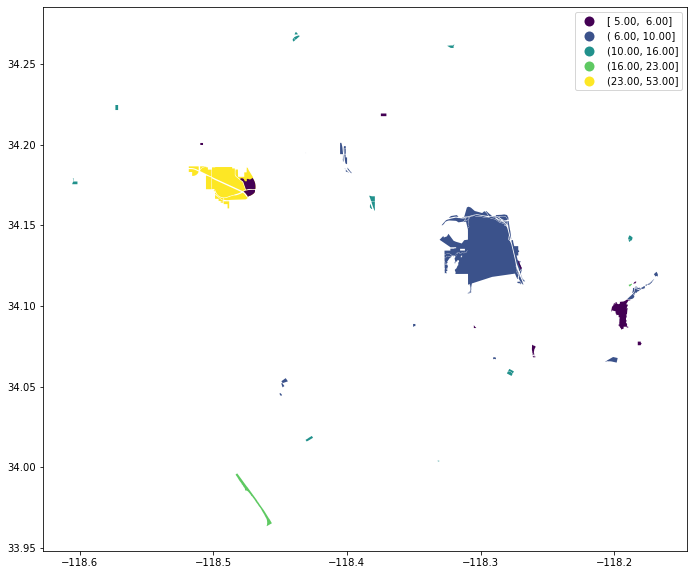

In [31]:
#Well I am pretty dang proud of this. Let's see it....
parks_w_encamp_2017.plot(figsize=(12,10),
                 column='freq',
                 legend=True, 
                 scheme='NaturalBreaks')

In [32]:
#I feel powerful. Next up let's see it in folium:

import folium
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

#lets try to sort by size
choropleth = folium.Choropleth(
    geo_data = parks_w_encamp_2017,
    name = 'choropleth',
    data = parks_w_encamp_2017,
    columns = ['name', 'freq'],
    key_on = 'feature.properties.name',
    fill_color = 'BuPu',
    line_weight = 0.5,
    fill_opacity = 0.8,
    line_opacity = 0.5,
    legend_name = 'Parks by Concentration of LA 311 Encampment Service Requests, 2017',
    highlight = True
).add_to(m)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name','freq'], labels=False)
)

choropleth.geojson.add_child(
    folium.features.GeoJsonPopup(['name','freq','area_acres','address'], labels=False)
)

m

In [33]:
m.save('LA_Parks_w_Encampment_Reports.html')